In [1]:
!pip install yfinance pandas scikit-learn keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 KB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 46.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 KB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.2/128.2 KB 15.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.0/111.0 KB 14.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 8.5 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.25.1
    Uninstalling requests-2.25.1:
      Successfully uninstalled requests-2.25.1
  Attempting uninstall: html5lib
    Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
   

[*********************100%***********************]  1 of 1 completed
Epoch 1/50
172/172 [==============================] - 2s 2ms/step - loss: 0.1198
Epoch 2/50
172/172 [==============================] - 0s 2ms/step - loss: 0.0454
Epoch 3/50
172/172 [==============================] - 0s 2ms/step - loss: 0.0302
Epoch 4/50
172/172 [==============================] - 0s 2ms/step - loss: 0.0250
Epoch 5/50
172/172 [==============================] - 0s 2ms/step - loss: 0.0195
Epoch 6/50
172/172 [==============================] - 0s 2ms/step - loss: 0.0142
Epoch 7/50
172/172 [==============================] - 0s 2ms/step - loss: 0.0094
Epoch 8/50
172/172 [==============================] - 0s 2ms/step - loss: 0.0055
Epoch 9/50
172/172 [==============================] - 0s 2ms/step - loss: 0.0028
Epoch 10/50
172/172 [==============================] - 0s 2ms/step - loss: 0.0012
Epoch 11/50
172/172 [==============================] - 0s 2ms/step - loss: 4.0923e-04
Epoch 12/50
172/172 [=============

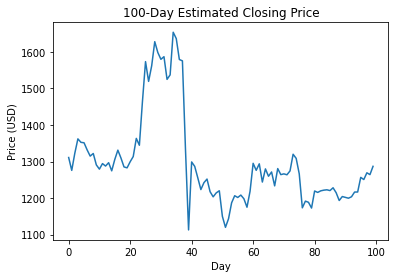

Day 1: 1310.9337158203125
Day 2: 1275.687744140625
Day 3: 1322.7554931640625
Day 4: 1361.9129638671875
Day 5: 1352.4617919921875
Day 6: 1351.3165283203125
Day 7: 1331.8931884765625
Day 8: 1314.7919921875
Day 9: 1321.9166259765625
Day 10: 1290.7261962890625
Day 11: 1279.112548828125
Day 12: 1294.2635498046875
Day 13: 1287.546142578125
Day 14: 1296.7607421875
Day 15: 1274.4876708984375
Day 16: 1305.593505859375
Day 17: 1331.083251953125
Day 18: 1309.7369384765625
Day 19: 1285.1947021484375
Day 20: 1282.6846923828125
Day 21: 1299.2694091796875
Day 22: 1313.58935546875
Day 23: 1363.2586669921875
Day 24: 1344.509521484375
Day 25: 1464.5040283203125
Day 26: 1573.36083984375
Day 27: 1519.2733154296875
Day 28: 1561.8975830078125
Day 29: 1627.9505615234375
Day 30: 1598.3197021484375
Day 31: 1579.7076416015625
Day 32: 1586.915771484375
Day 33: 1524.8162841796875
Day 34: 1537.0955810546875
Day 35: 1653.786376953125
Day 36: 1636.3846435546875
Day 37: 1579.212646484375
Day 38: 1575.451904296875
Day

In [11]:
import yfinance as yf
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt



data = yf.download("ETH-USD", start="2022-07-01", end="2023-01-09")

data = data[['Close']]

scaler = MinMaxScaler(feature_range=(0, 1))
data = scaler.fit_transform(data)
X_train, X_test, y_train, y_test = train_test_split(data, data, test_size=0.1)

data_train = data[:len(data)-100]
data_test = data[len(data)-100:]


data_train = np.array(data_train)
data_train = data_train.reshape(data_train.shape[0], 1, data_train.shape[1])

model = Sequential()
model.add(LSTM(units=4, input_shape=(1, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train,y_train,batch_size=1,epochs=50)


data_test = np.array(data_test)
data_test = data_test.reshape(data_test.shape[0], 1, data_test.shape[1])
predictions = model.predict(data_test)


predictions = scaler.inverse_transform(predictions)


plt.plot(predictions)
plt.xlabel("Day")
plt.ylabel("Price (USD)")
plt.title("100-Day Estimated Closing Price")
plt.show()

for i in range(100):
    print("Day {}: {}".format(i+1, predictions[i][0]))


